Data loaded successfully.
Dataset shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            

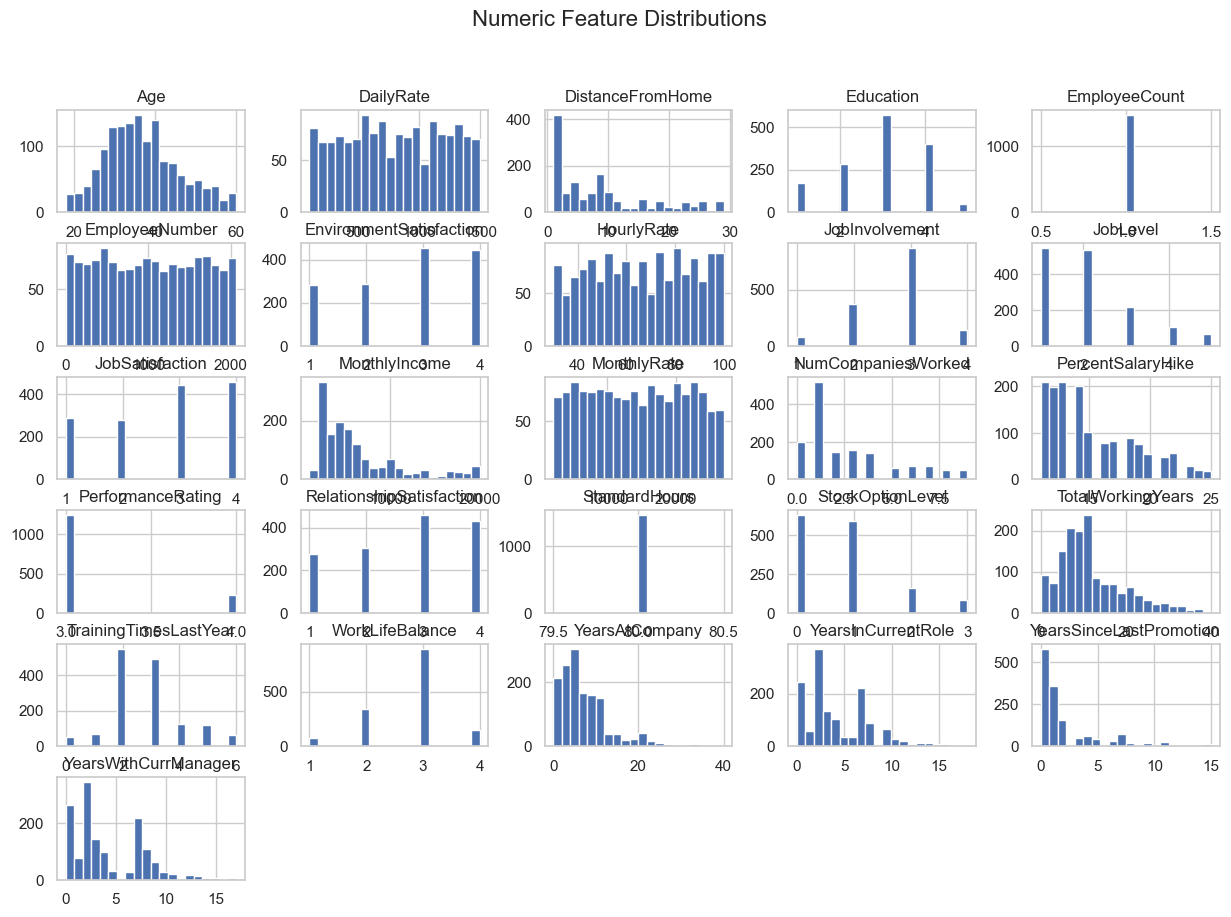

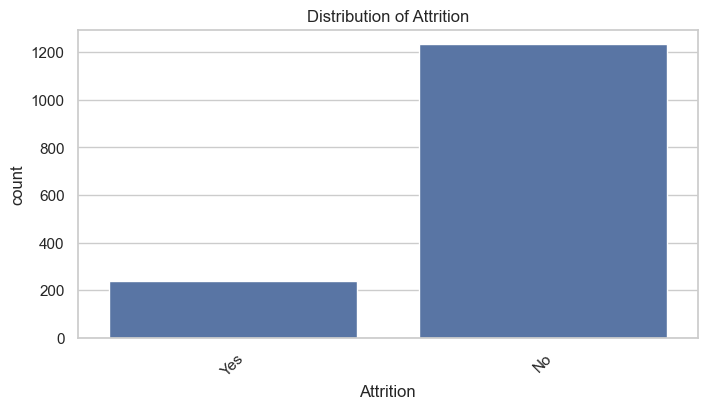

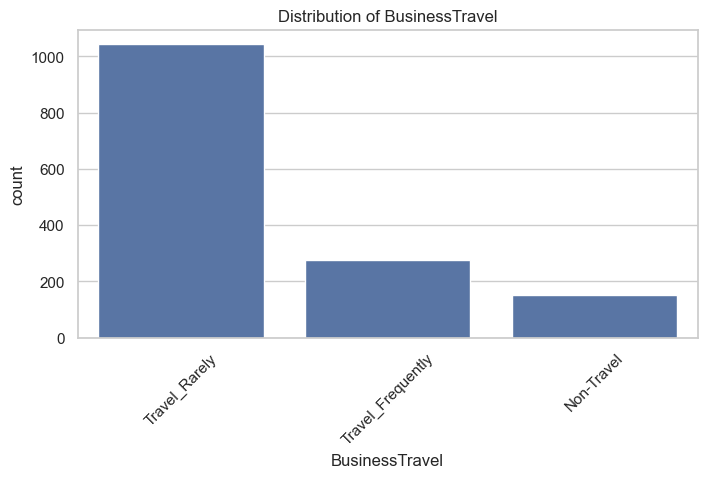

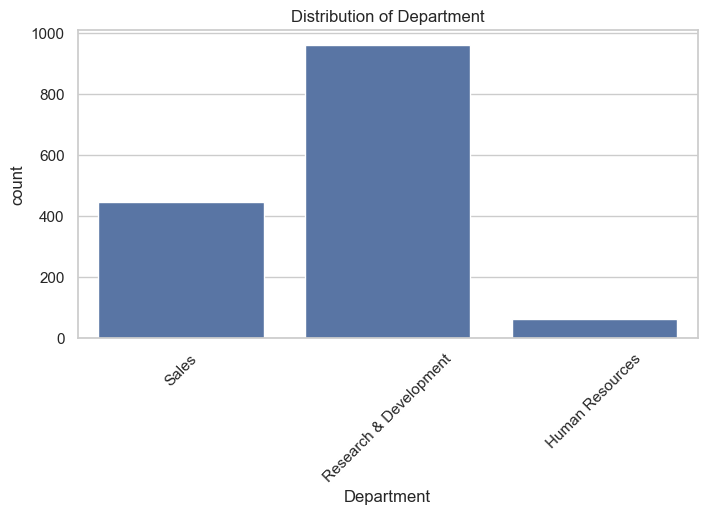

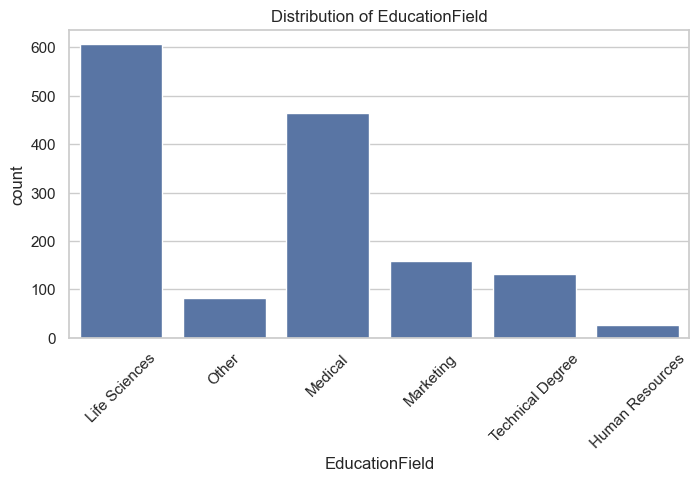

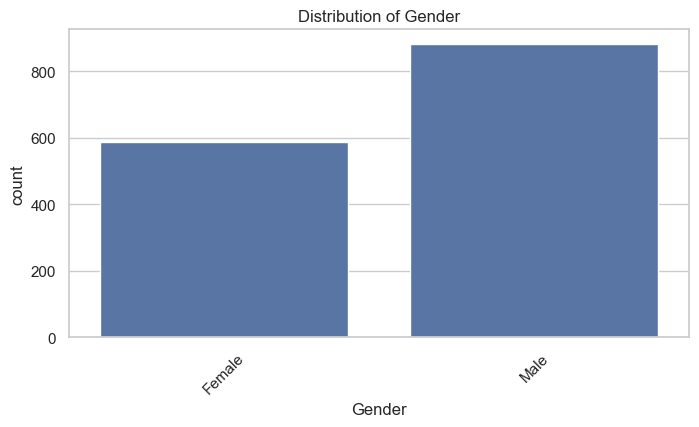

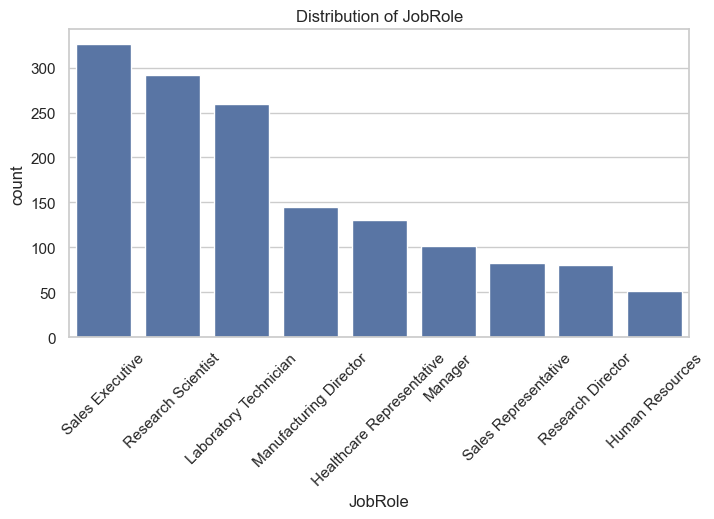

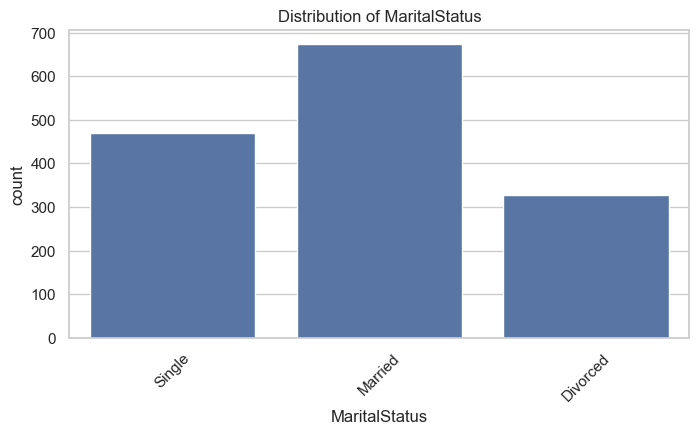

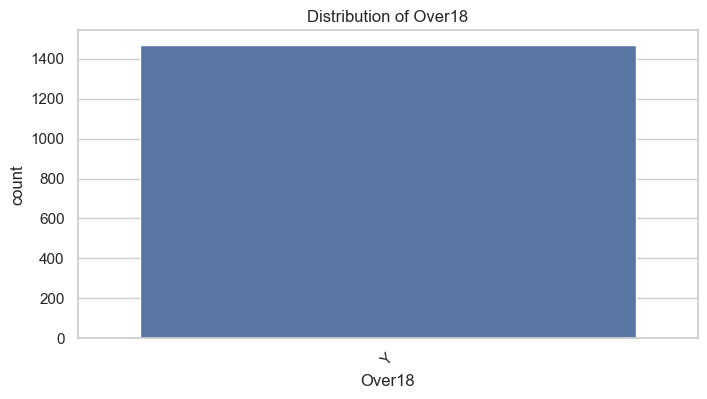

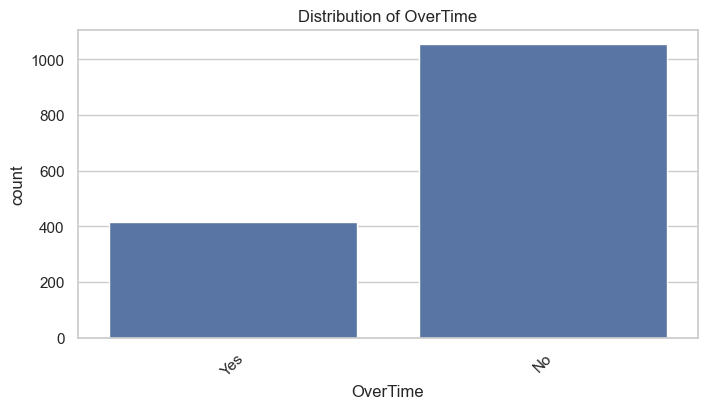

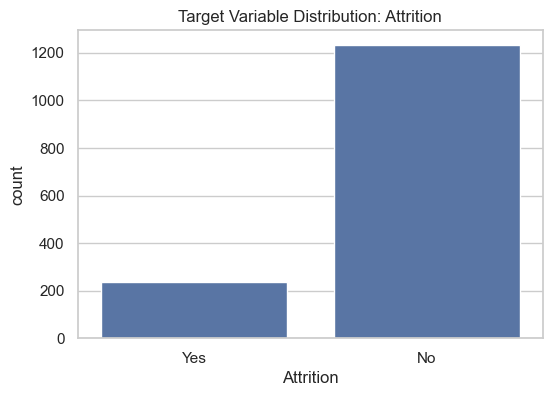

Attrition
No     1233
Yes     237
Name: count, dtype: int64


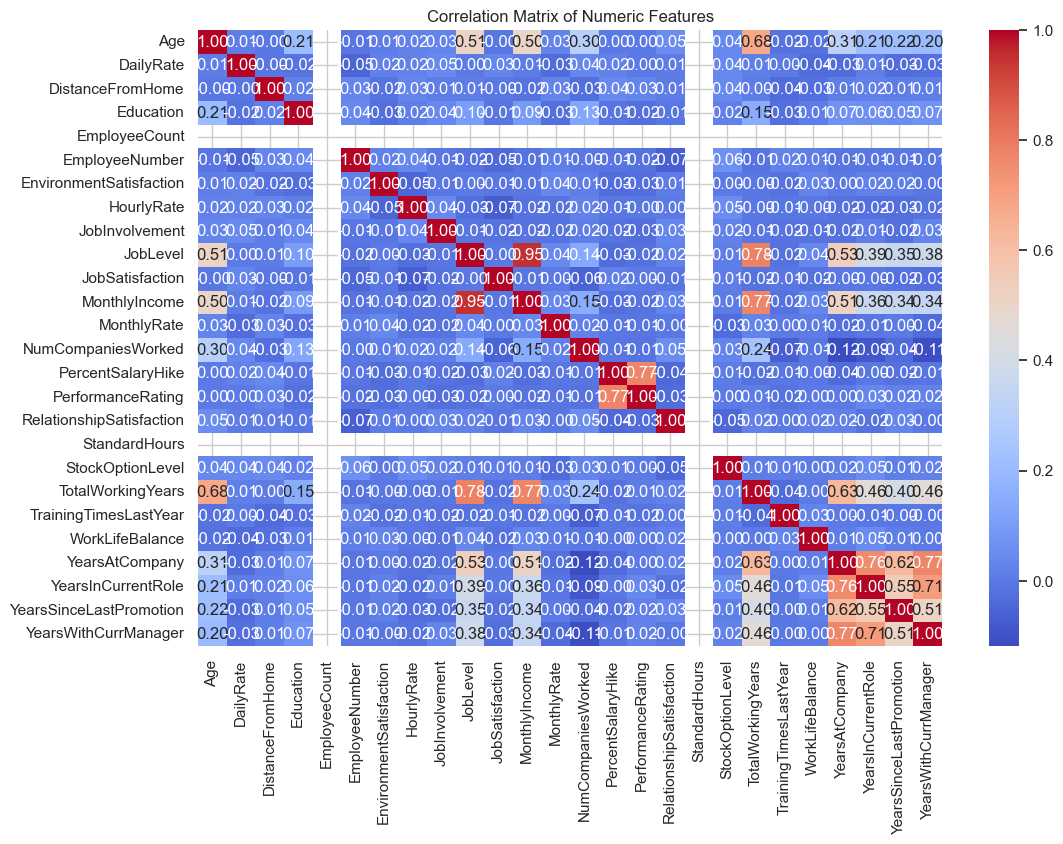

Processed data saved to c:\Users\kakinwande1\Employee_atrttion\data\processed\employee_data_processed.csv


In [ ]:
# ============================================================
# Employee Attrition Project - Starter Notebook
# 01_data_exploration.ipynb
# Purpose: Load data, perform initial cleaning and exploratory analysis
# ============================================================

# -------------------------
# 1. Import Libraries
# -------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Optional for interactive plots
import plotly.express as px

# Set some display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
sns.set(style='whitegrid')

# -------------------------
# 2. Set Paths (Corrected)
# -------------------------

# This moves from /notebooks → project root folder
project_root = os.path.dirname(os.getcwd())

data_folder = os.path.join(project_root, 'data', 'raw')
processed_folder = os.path.join(project_root, 'data', 'processed')

file_name = 'employee_data.csv'
file_path = os.path.join(data_folder, file_name)

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")



# -------------------------
# 3. Load Dataset
# -------------------------
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path and filename.")

# -------------------------
# 4. Quick Overview
# -------------------------
# Check shape
print(f"Dataset shape: {df.shape}")

# View first 5 rows
df.head()

# Info and data types
df.info()

# Summary statistics for numeric columns
df.describe()

# -------------------------
# 5. Missing Values Check
# -------------------------
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_table = pd.concat([missing_summary, missing_percentage], axis=1)
missing_table.columns = ['Missing Count', 'Missing %']
print(missing_table[missing_table['Missing Count'] > 0])

# -------------------------
# 6. Basic Distribution Checks
# -------------------------
# Numeric features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Numeric Feature Distributions', fontsize=16)
plt.show()

# Categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# -------------------------
# 7. Target Variable Analysis
# -------------------------
# Replace 'Attrition' with your target column name
target = 'Attrition'  

if target in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=target)
    plt.title(f"Target Variable Distribution: {target}")
    plt.show()
    
    print(df[target].value_counts())
else:
    print(f"Target column '{target}' not found in dataset.")

# -------------------------
# 8. Correlation Check
# -------------------------
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# -------------------------
# 9. Save Processed Copy (Optional)
# -------------------------
processed_file_path = os.path.join(processed_folder, 'employee_data_processed.csv')
os.makedirs(processed_folder, exist_ok=True)
df.to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")
